# outliers

In [13]:
import pandas as pd
import numpy as np
!pip install sweetviz
import sweetviz as sv
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#!pip uninstall numpy pandas
#!pip install numpy pandas
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings("ignore")
#!pip install missingno

In [14]:
merged_df = pd.read_csv(r"C:\Users\user\OneDrive\שולחן העבודה\Project Avital Spaceship Titanic\merged_df.csv",index_col=0)

In [16]:
Age = merged_df['Age']
RoomService = merged_df['RoomService']
FoodCourt = merged_df['FoodCourt']
ShoppingMall = merged_df['ShoppingMall']
Spa = merged_df['Spa']
VRDeck = merged_df['VRDeck']
continuous_df = pd.concat([Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck], axis=1)

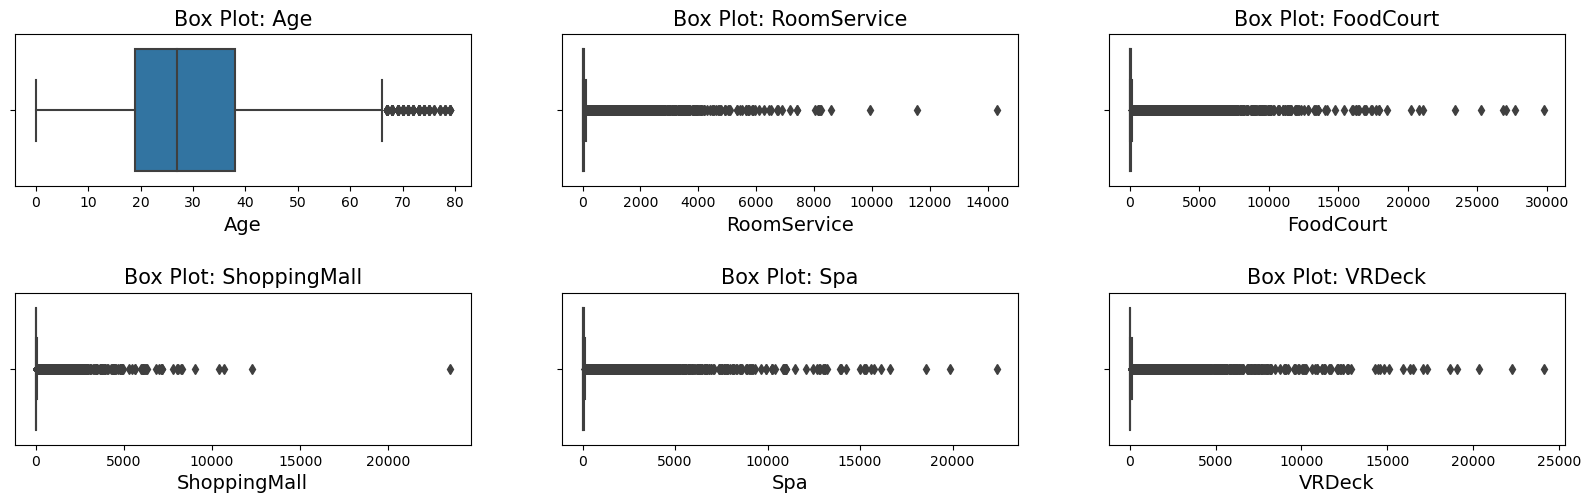

In [18]:
plt.figure(figsize=(20,200))

def outliers_boxplot(continuous_df):
    for i, col in enumerate(continuous_df.columns):
        if col != 'Transported':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=continuous_df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
            
outliers_boxplot(continuous_df)

In [19]:
def outliers_merged_df(merged_df):
    total_outliers = pd.DataFrame(columns={'Outlier count','Percent'})
    for col in merged_df:
        if col != 'host_is_superhost':
            temp = pd.DataFrame(merged_df[col], columns={col})
            Q1 = merged_df[col].quantile(0.25)
            Q3 = merged_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            upper_outliers = temp[temp[col] > upper_limit]
            lower_outliers = temp[temp[col] < lower_limit]
            temp = upper_outliers.append(lower_outliers)
            b = "{}".format(col)
            num = len(temp)
            total_outliers.loc[b] = [num, num/len(merged_df)*100]
    return total_outliers[total_outliers['Percent']>0]
       
outliers_merged_df = outliers_merged_df(continuous_df).sort_values('Percent', ascending=False)
outliers_merged_df


,Percent,Outlier count
RoomService,3009.0,23.199692
FoodCourt,2988.0,23.037779
VRDeck,2977.0,22.952968
ShoppingMall,2973.0,22.922128
Spa,2973.0,22.922128
Age,2391.0,18.434850


# LABELLING OUTLIERS

In [21]:
def outliers(merged_df):
    label_out_merged_df = merged_df.copy()
    for col in label_out_merged_df:
        if col in outliers_merged_df.index:
            Q1 = label_out_merged_df[col].quantile(0.25)
            Q3 = label_out_merged_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_merged_df[col] = np.where(label_out_merged_df[col] > upper_limit,'Outlier',np.where(label_out_merged_df[col] < lower_limit,'Outlier',label_out_merged_df[col]))
    return label_out_merged_df
new_merged_df_outliers = outliers(merged_df)
new_merged_df_outliers.head(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
0,1301,Earth,1.0,G3S,TRAPPIST,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,NaN
1,1801,Earth,0.0,F4S,TRAPPIST,19.0,0.0,0.0,9.0,0.0,Outlier,0.0,Lerome Peckers,F,4.0,S,NaN
2,1901,Europa,1.0,C0S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,NaN
3,2101,Europa,0.0,C1S,TRAPPIST,38.0,0.0,0.0,Outlier,0.0,Outlier,Outlier,Meratz Caltilter,C,1.0,S,NaN
4,2301,Earth,0.0,F5S,TRAPPIST,20.0,0.0,10.0,0.0,Outlier,0.0,0.0,Brence Harperez,F,5.0,S,NaN
5,2701,Earth,0.0,F7P,TRAPPIST,31.0,0.0,0.0,Outlier,Outlier,Outlier,60.0,Karlen Ricks,F,7.0,P,NaN
6,2901,Europa,1.0,B2P,55 Cancri e,21.0,0.0,0.0,nan,0.0,0.0,0.0,Aldah Ainserfle,B,2.0,P,NaN
7,3201,Europa,1.0,D0S,TRAPPIST,20.0,0.0,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,D,0.0,S,NaN
8,3202,Europa,1.0,D0S,55 Cancri e,23.0,0.0,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,D,0.0,S,NaN
9,3301,Earth,0.0,F7S,55 Cancri e,24.0,0.0,0.0,Outlier,0.0,0.0,0.0,Eliana Delazarson,F,7.0,S,NaN


In [22]:
#Labeling every outlier with 'outlier' in order to seperate the outliers from nulls (temporarily, and then to 0/1):
def outliers(merged_df):
    label_out_merged_df = merged_df.copy()
    for col in label_out_merged_df:
        if col in outliers_merged_df.index:
            Q1 = label_out_merged_df[col].quantile(0.25)
            Q3 = label_out_merged_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_merged_df[col] = np.where(label_out_merged_df[col] > upper_limit,'Outlier',np.where(label_out_merged_df[col] < lower_limit,'Outlier',label_out_merged_df[col]))
    return label_out_merged_df
new_merged_df_outliers = outliers(merged_df)
new_merged_df_outliers.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
0,1301,Earth,1.0,G3S,TRAPPIST,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,NaN
1,1801,Earth,0.0,F4S,TRAPPIST,19.0,0.0,0.0,9.0,0.0,Outlier,0.0,Lerome Peckers,F,4.0,S,NaN
2,1901,Europa,1.0,C0S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,NaN
3,2101,Europa,0.0,C1S,TRAPPIST,38.0,0.0,0.0,Outlier,0.0,Outlier,Outlier,Meratz Caltilter,C,1.0,S,NaN
4,2301,Earth,0.0,F5S,TRAPPIST,20.0,0.0,10.0,0.0,Outlier,0.0,0.0,Brence Harperez,F,5.0,S,NaN
5,2701,Earth,0.0,F7P,TRAPPIST,31.0,0.0,0.0,Outlier,Outlier,Outlier,60.0,Karlen Ricks,F,7.0,P,NaN
6,2901,Europa,1.0,B2P,55 Cancri e,21.0,0.0,0.0,nan,0.0,0.0,0.0,Aldah Ainserfle,B,2.0,P,NaN
7,3201,Europa,1.0,D0S,TRAPPIST,20.0,0.0,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,D,0.0,S,NaN
8,3202,Europa,1.0,D0S,55 Cancri e,23.0,0.0,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,D,0.0,S,NaN
9,3301,Earth,0.0,F7S,55 Cancri e,24.0,0.0,0.0,Outlier,0.0,0.0,0.0,Eliana Delazarson,F,7.0,S,NaN


In [23]:
### df_outliers
#creating a dataframe with outliers as 1 and non-outliers as 0:
merged_df_outliers = new_merged_df_outliers.isin(['Outlier']) 
merged_df_outliers = merged_df_outliers.astype('int')
merged_df_outliers

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0
12966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12967,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12968,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0


In [24]:
def capping(merged_df):
    temp = merged_df.copy()
    for col in temp:
        if col in outliers_merged_df.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
temp = capping(merged_df)
temp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
0,1301,Earth,1.0,G3S,TRAPPIST,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,NaN
1,1801,Earth,0.0,F4S,TRAPPIST,19.0,0.0,0.0,9.0,0.0,NaN,0.0,Lerome Peckers,F,4.0,S,NaN
2,1901,Europa,1.0,C0S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,NaN
3,2101,Europa,0.0,C1S,TRAPPIST,38.0,0.0,0.0,NaN,0.0,NaN,NaN,Meratz Caltilter,C,1.0,S,NaN
4,2301,Earth,0.0,F5S,TRAPPIST,20.0,0.0,10.0,0.0,NaN,0.0,0.0,Brence Harperez,F,5.0,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,927601,Europa,0.0,A98P,55 Cancri e,41.0,1.0,0.0,NaN,0.0,NaN,NaN,Gravior Noxnuther,A,98.0,P,False
12966,927801,Earth,1.0,G1499S,PSO,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,G,1499.0,S,False
12967,927901,Earth,0.0,G1500S,TRAPPIST,26.0,0.0,0.0,0.0,NaN,1.0,0.0,Fayey Connon,G,1500.0,S,True
12968,928001,Europa,0.0,E608S,55 Cancri e,32.0,0.0,0.0,NaN,0.0,NaN,NaN,Celeon Hontichre,E,608.0,S,False


Saving the inter quartal outliers dataframe for future reference

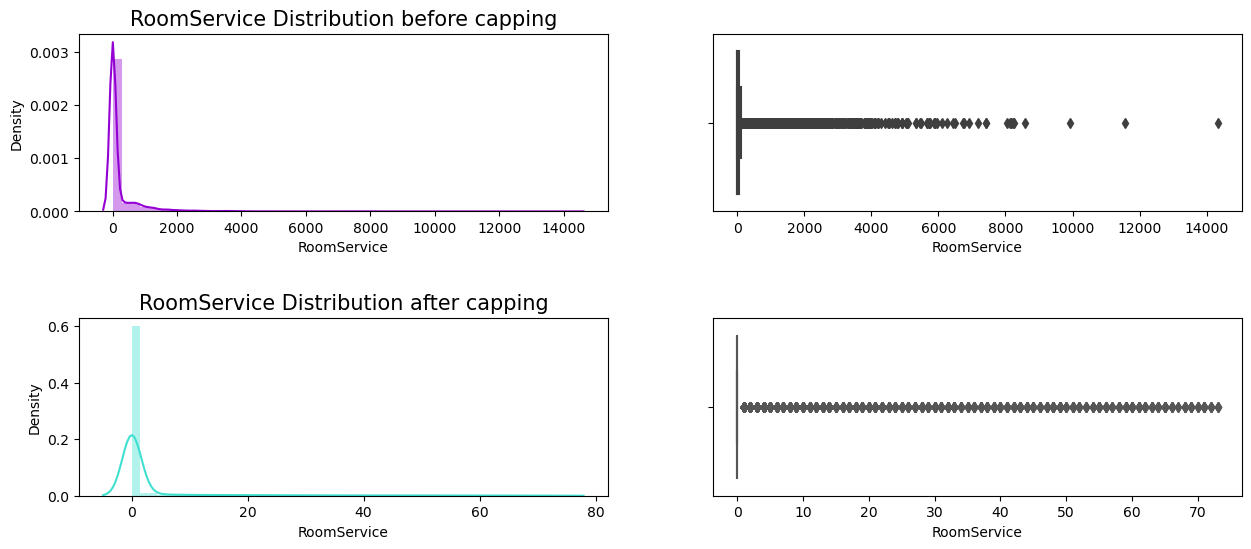

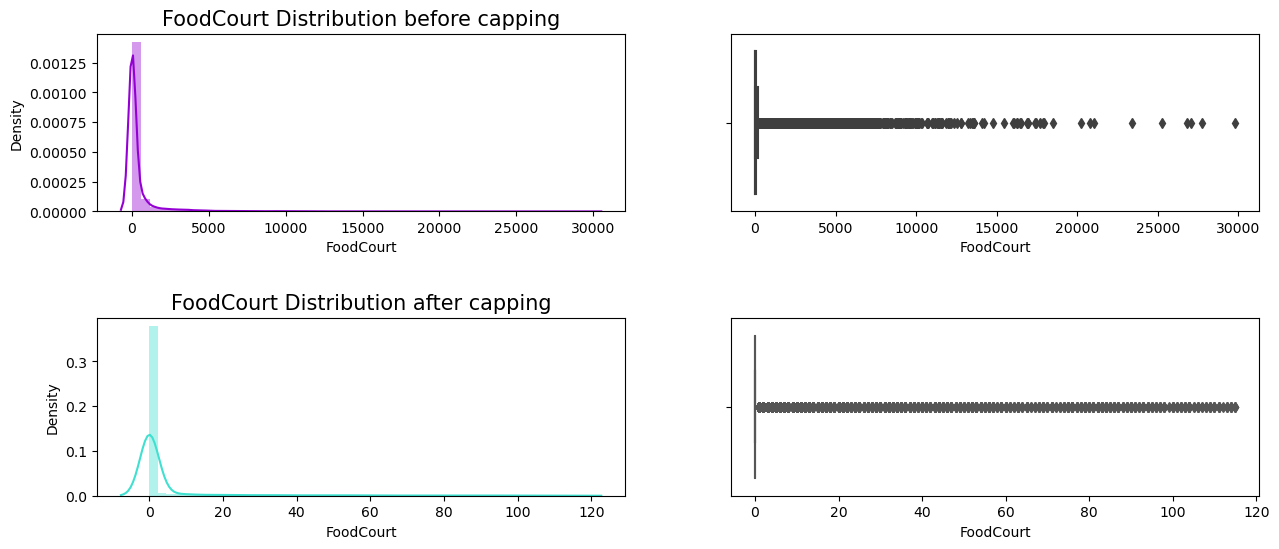

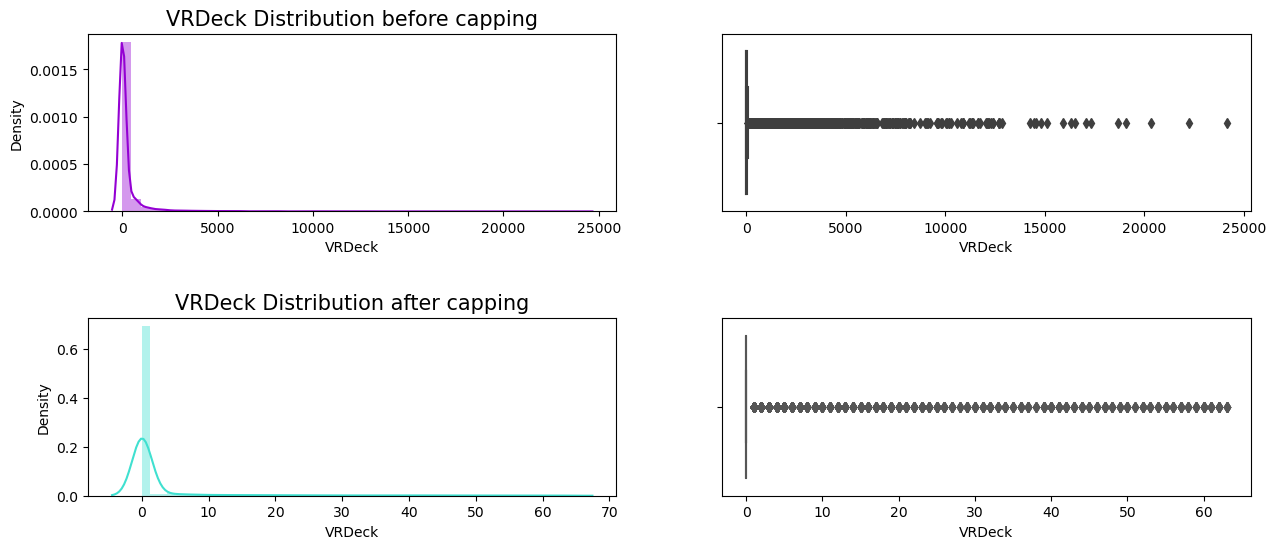

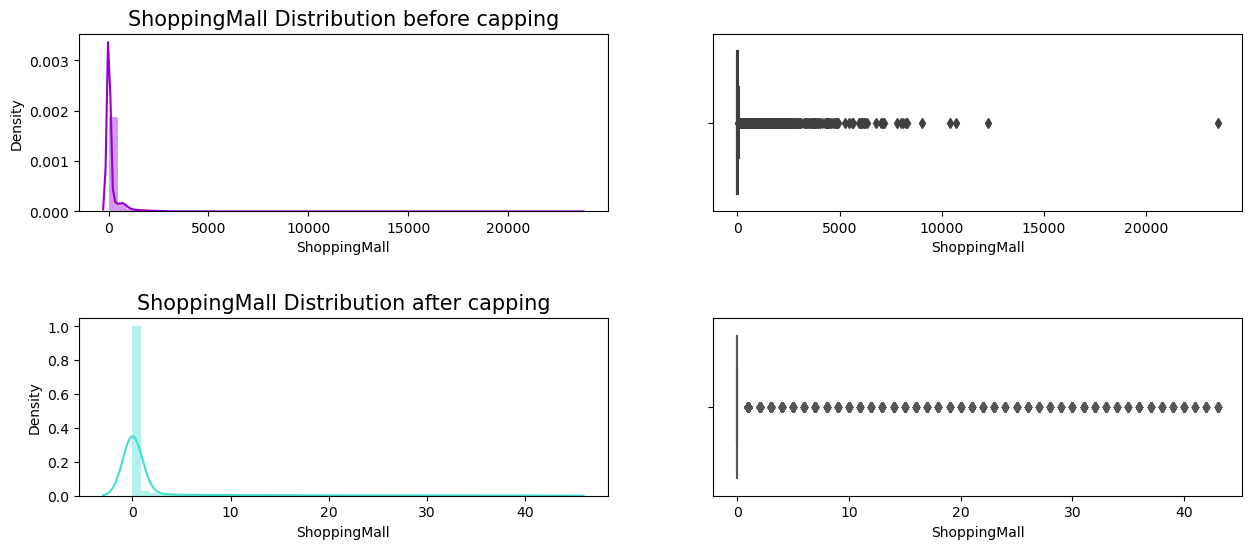

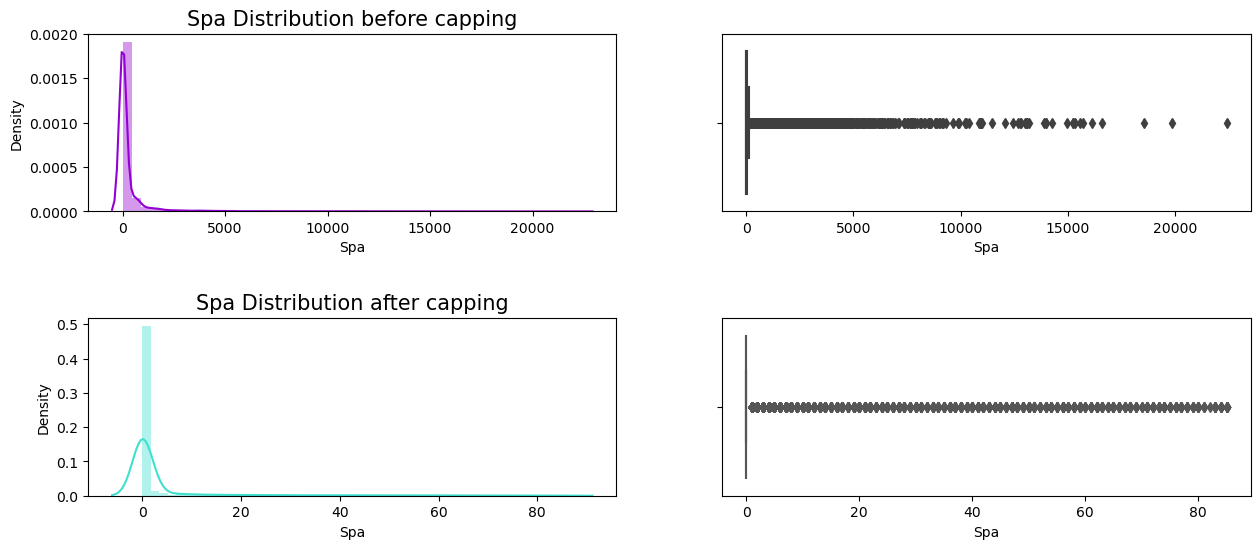

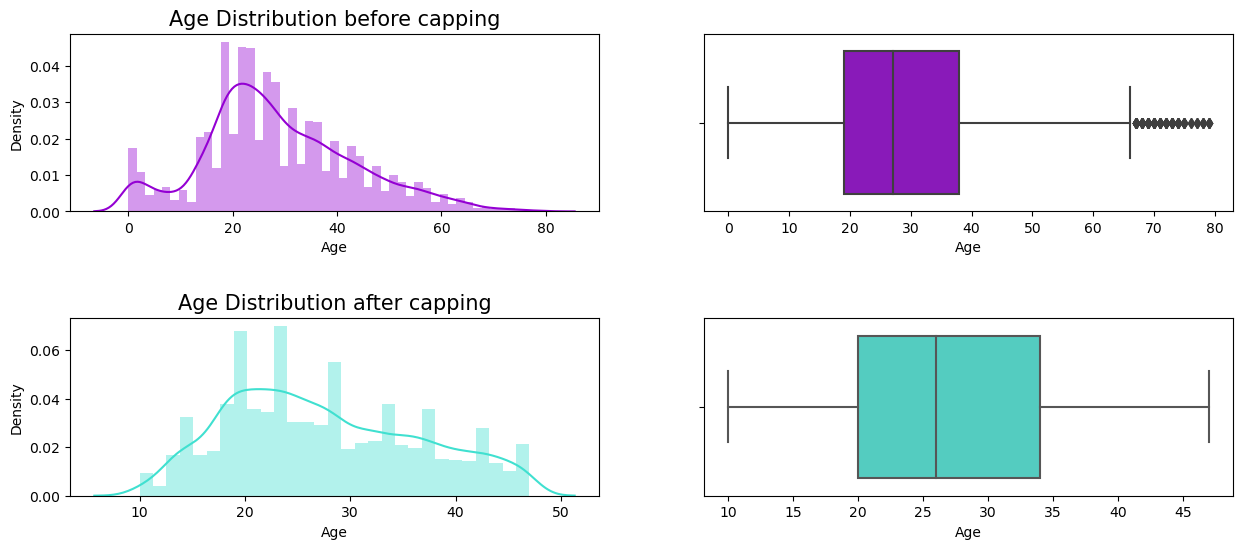

In [25]:
def dist_outliers(original_merged_df, new, cols, color_original='darkviolet', color_new='turquoise'):
    for col in cols:
        if col in original_merged_df.columns:
            plt.figure(figsize=(15, 6))
            plt.subplot(2, 2, 1)
            sns.distplot(original_merged_df[col], color=color_original)
            plt.title('{} Distribution before capping'.format(col), fontsize=15)

            plt.subplot(2, 2, 2)
            sns.boxplot(original_merged_df[col], color=color_original)
            plt.subplots_adjust(hspace=0.6)

            plt.subplot(2, 2, 3)
            sns.distplot(new[col], color=color_new)
            plt.title('{} Distribution after capping'.format(col), fontsize=15)

            plt.subplot(2, 2, 4)
            sns.boxplot(new[col], color=color_new)

            plt.show()

dist_outliers(merged_df, temp, outliers_merged_df.index, color_original='darkviolet', color_new='turquoise')


We clearly need to filter some features that either the feature distribution has changed significantly, or cases where removing outliers results with only one value.

Checking if distribution (Kolmogorov–Smirnov) and/or correlation has changed significantly:

In [26]:
from scipy import stats

In [27]:
z = np.abs(stats.zscore(continuous_df))
print(z)

       Age  RoomService  FoodCourt  ShoppingMall  Spa  VRDeck
0      NaN          NaN        NaN           NaN  NaN     NaN
1      NaN          NaN        NaN           NaN  NaN     NaN
2      NaN          NaN        NaN           NaN  NaN     NaN
3      NaN          NaN        NaN           NaN  NaN     NaN
4      NaN          NaN        NaN           NaN  NaN     NaN
...    ...          ...        ...           ...  ...     ...
12965  NaN          NaN        NaN           NaN  NaN     NaN
12966  NaN          NaN        NaN           NaN  NaN     NaN
12967  NaN          NaN        NaN           NaN  NaN     NaN
12968  NaN          NaN        NaN           NaN  NaN     NaN
12969  NaN          NaN        NaN           NaN  NaN     NaN

[12970 rows x 6 columns]


In [30]:
# Calculate correlations with outliers
correlation_with_outliers = continuous_df.corr()
# Find indices of outliers
outlier_threshold = 3  # Adjust as needed
#outlier_indices = (np.abs(stats.zscore(merged_df.drop(columns=["Transported"]))) > outlier_threshold).any(axis=1)

In [32]:
# Initialize a list to store outliers that change either correlation or distribution
outliers_change_corr_or_dist = []

# Iterate through each column and find outliers that change correlation or distribution
for column in continuous_df.columns:
    if column == "Transported":
        continue
    
    # Find indices of outliers
    outlier_indices = np.where(np.abs(stats.zscore(merged_df[column])) > outlier_threshold)
    
    # Calculate correlation without the outliers
    merged_df_no_outliers = merged_df.drop(index=outlier_indices[0])
    correlation_without_outliers = merged_df_no_outliers.corr()
    
    # Compare correlations and check if distribution changes
    if not np.allclose(correlation_with_outliers, correlation_without_outliers, rtol=0.05) or not np.array_equal(correlation_with_outliers, correlation_without_outliers):
        outliers_change_corr_or_dist.extend(outlier_indices[0])

# Remove duplicates from the list
outliers_change_corr_or_dist = list(set(outliers_change_corr_or_dist))

# Print the outliers that change either correlation or distribution
print("Outliers changing either correlation or distribution:", outliers_change_corr_or_dist)

ValueError: operands could not be broadcast together with shapes (6,6) (10,10) 

In [33]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

In [34]:
c=continuous_df
names=c.columns
#Creating df that reflects the correlation change
out_merged_df= pd.DataFrame(columns=['feature','outliers_cnt','distribution_changed','correlation_changed'])


In [35]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change the distribution
out_merged_df['drop']='yes'
out_merged_df.loc[(out_merged_df.distribution_changed=='+')& (out_merged_df.correlation_changed=='+'),'drop'] = 'no'
out_merged_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop


# DF_MISSING

In [36]:
merged_df_nulls = merged_df.copy()
for col in merged_df_nulls:
    if merged_df_nulls[col].isna().sum() == 0:
        del merged_df_nulls[col]
merged_df_nulls

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
0,Earth,1.0,G3S,TRAPPIST,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,NaN
1,Earth,0.0,F4S,TRAPPIST,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S,NaN
2,Europa,1.0,C0S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,NaN
3,Europa,0.0,C1S,TRAPPIST,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S,NaN
4,Earth,0.0,F5S,TRAPPIST,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Europa,0.0,A98P,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,A,98.0,P,False
12966,Earth,1.0,G1499S,PSO,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,G,1499.0,S,False
12967,Earth,0.0,G1500S,TRAPPIST,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,G,1500.0,S,True
12968,Europa,0.0,E608S,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,E,608.0,S,False


In [37]:
!pip install missingno
import missingno as msno

<AxesSubplot:>

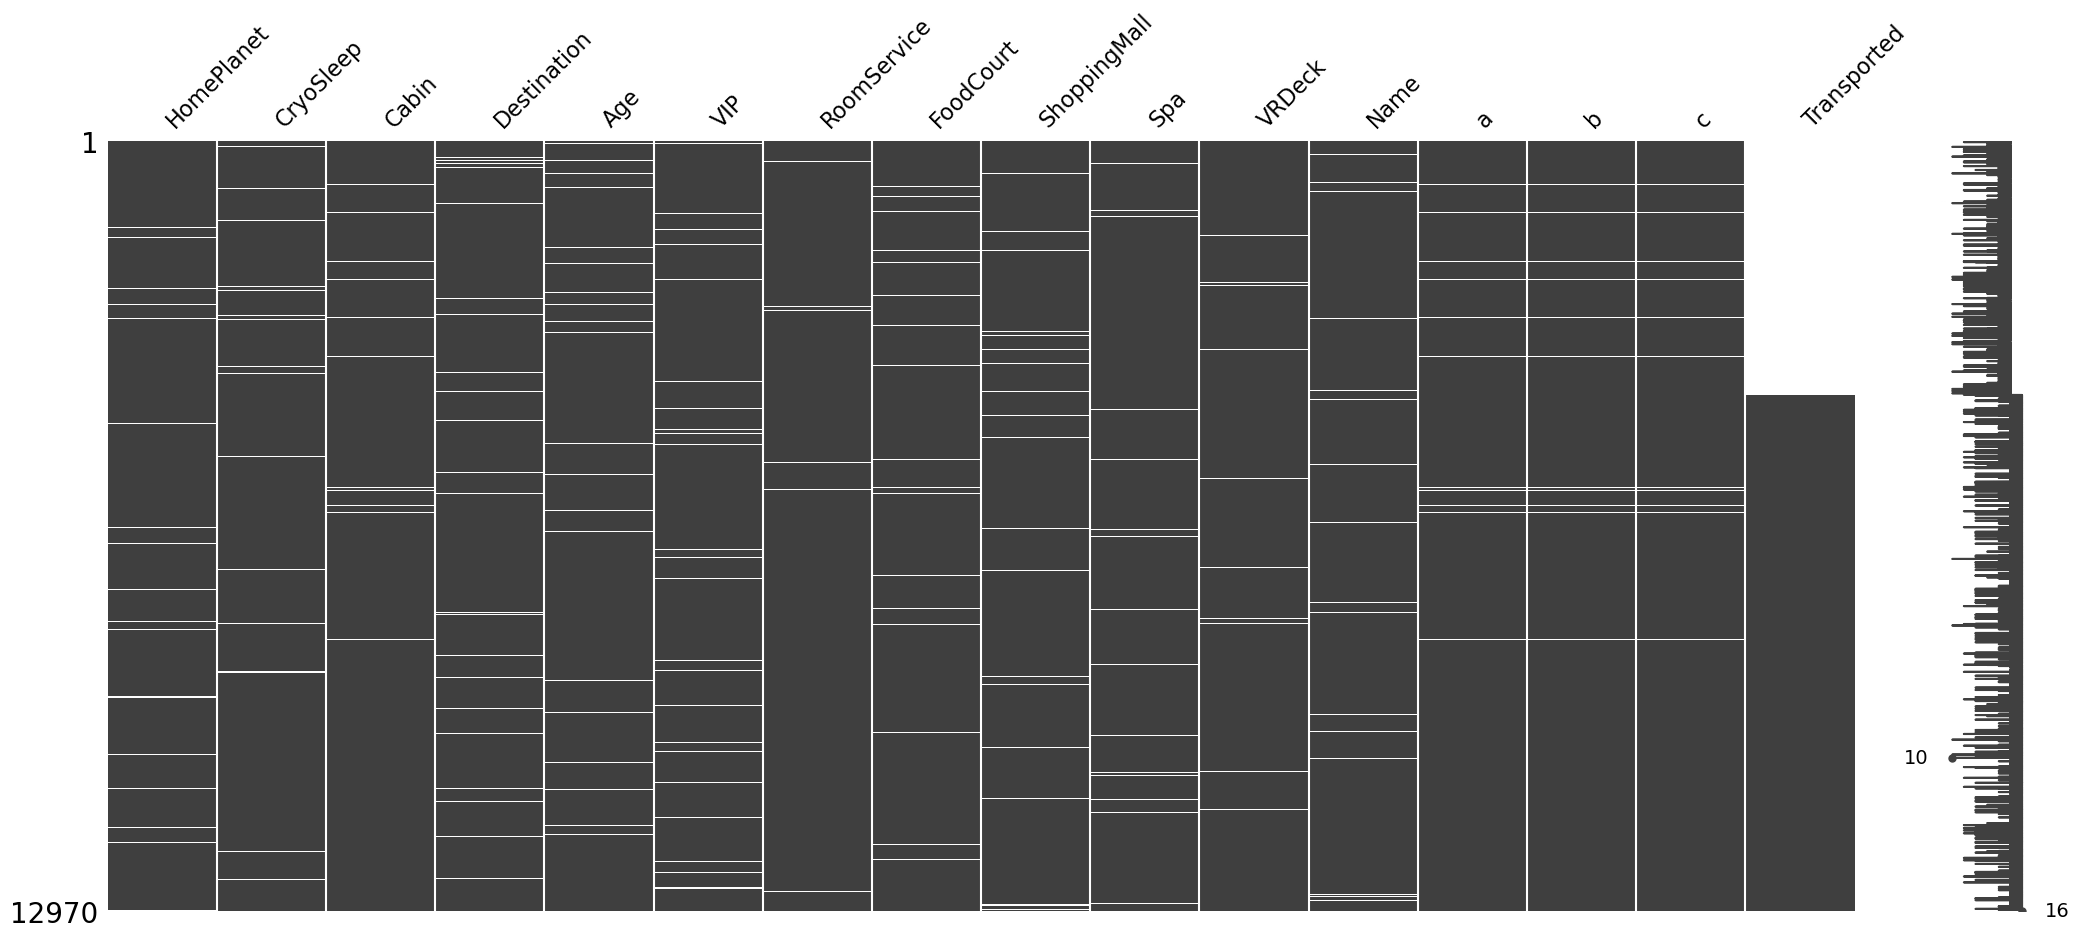

In [38]:
msno.matrix(merged_df_nulls)

In [39]:
merged_df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
a                299
b                299
c                299
Transported     4277
dtype: int64

In [40]:
merged_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

# Missing Values

In [41]:
merged_df[merged_df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
0,1301,Earth,1.0,G3S,TRAPPIST,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,NaN
1,1801,Earth,0.0,F4S,TRAPPIST,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S,NaN
2,1901,Europa,1.0,C0S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,NaN
3,2101,Europa,0.0,C1S,TRAPPIST,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S,NaN
4,2301,Earth,0.0,F5S,TRAPPIST,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12944,925001,Europa,0.0,E597P,TRAPPIST,29.0,0.0,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,E,597.0,P,True
12951,925701,NaN,0.0,F1892P,TRAPPIST,13.0,0.0,39.0,0.0,1085.0,24.0,0.0,Ties Apple,F,1892.0,P,False
12952,925901,Earth,NaN,F1893P,TRAPPIST,44.0,0.0,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,F,1893.0,P,True
12961,927401,NaN,1.0,G1508P,TRAPPIST,23.0,0.0,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,G,1508.0,P,True


# Missing matrix

In [43]:
merged_df_missing=merged_df[merged_df.isna().any(axis=1)]
merged_df_missing.shape
merged_df_missing.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
0,1301,Earth,1.0,G3S,TRAPPIST,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,NaN
1,1801,Earth,0.0,F4S,TRAPPIST,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S,NaN
2,1901,Europa,1.0,C0S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,NaN
3,2101,Europa,0.0,C1S,TRAPPIST,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S,NaN
4,2301,Earth,0.0,F5S,TRAPPIST,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S,NaN


In [44]:
#KNN
#Imputed data
from sklearn.impute import KNNImputer
imputed_df = continuous_df.copy()
imp_cols = imputed_df.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=2)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(imputed_df[imp_cols]),columns = imp_cols)

In [45]:
imputed_df[imp_cols]=imputed_data

<AxesSubplot:>

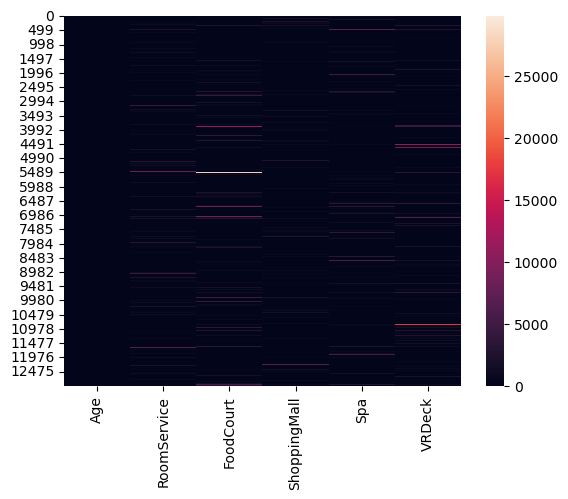

In [46]:
sns.heatmap(imputed_data) 

In [47]:
imputed_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
12965,41.0,0.0,6819.0,0.0,1643.0,74.0
12966,18.0,0.0,0.0,0.0,0.0,0.0
12967,26.0,0.0,0.0,1872.0,1.0,0.0
12968,32.0,0.0,1049.0,0.0,353.0,3235.0


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  int64  
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  float64
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  float64
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  a             12671 non-null  object 
 14  b             12671 non-null  float64
 15  c             12671 non-null  object 
 16  Transported   8693 non-null   object 
dtypes: float64(9), int64(1), object(7)
memory usage: 2.3+ MB


In [50]:
Destination = merged_df['Destination']
HomePlanet = merged_df['HomePlanet']
categorial_df = pd.concat([Destination, HomePlanet], axis=1)

<AxesSubplot:>

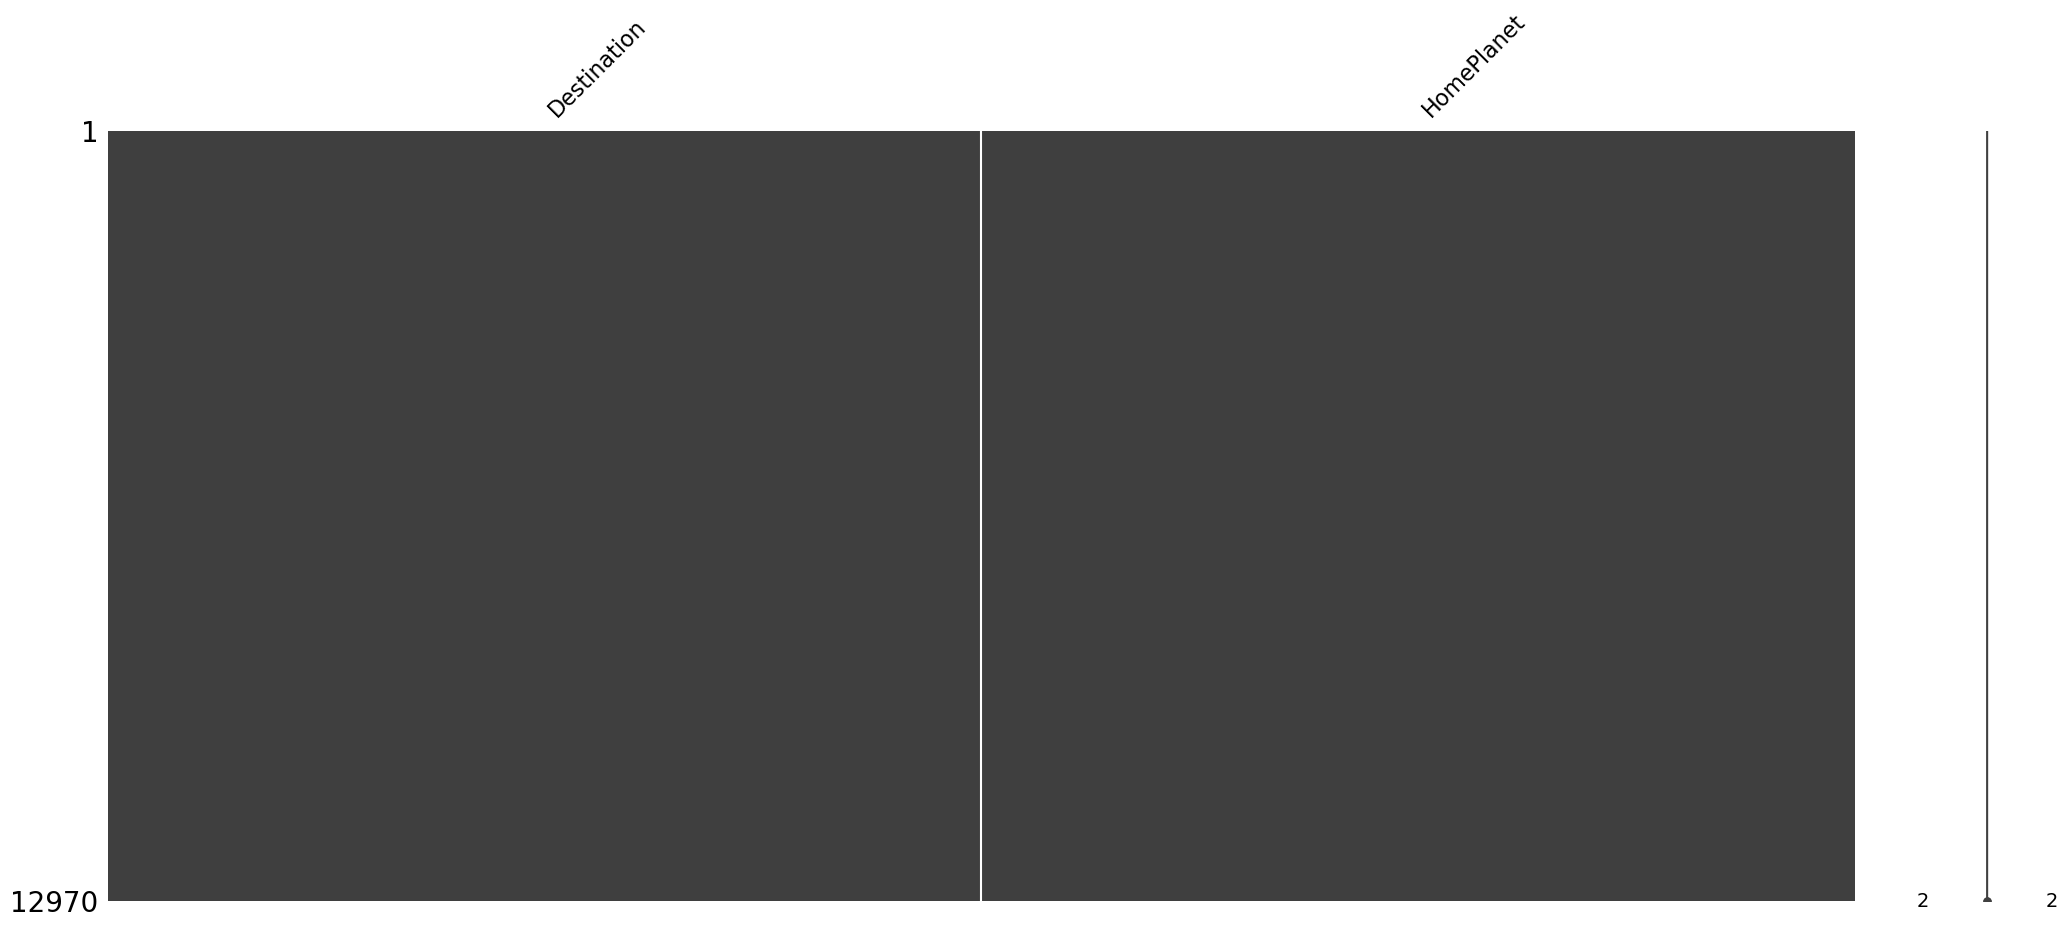

In [51]:
categorial_df['Destination']=categorial_df['Destination'].fillna('missing')
categorial_df['HomePlanet']=categorial_df['HomePlanet'].fillna('missing')
msno.matrix(categorial_df)

<AxesSubplot:>

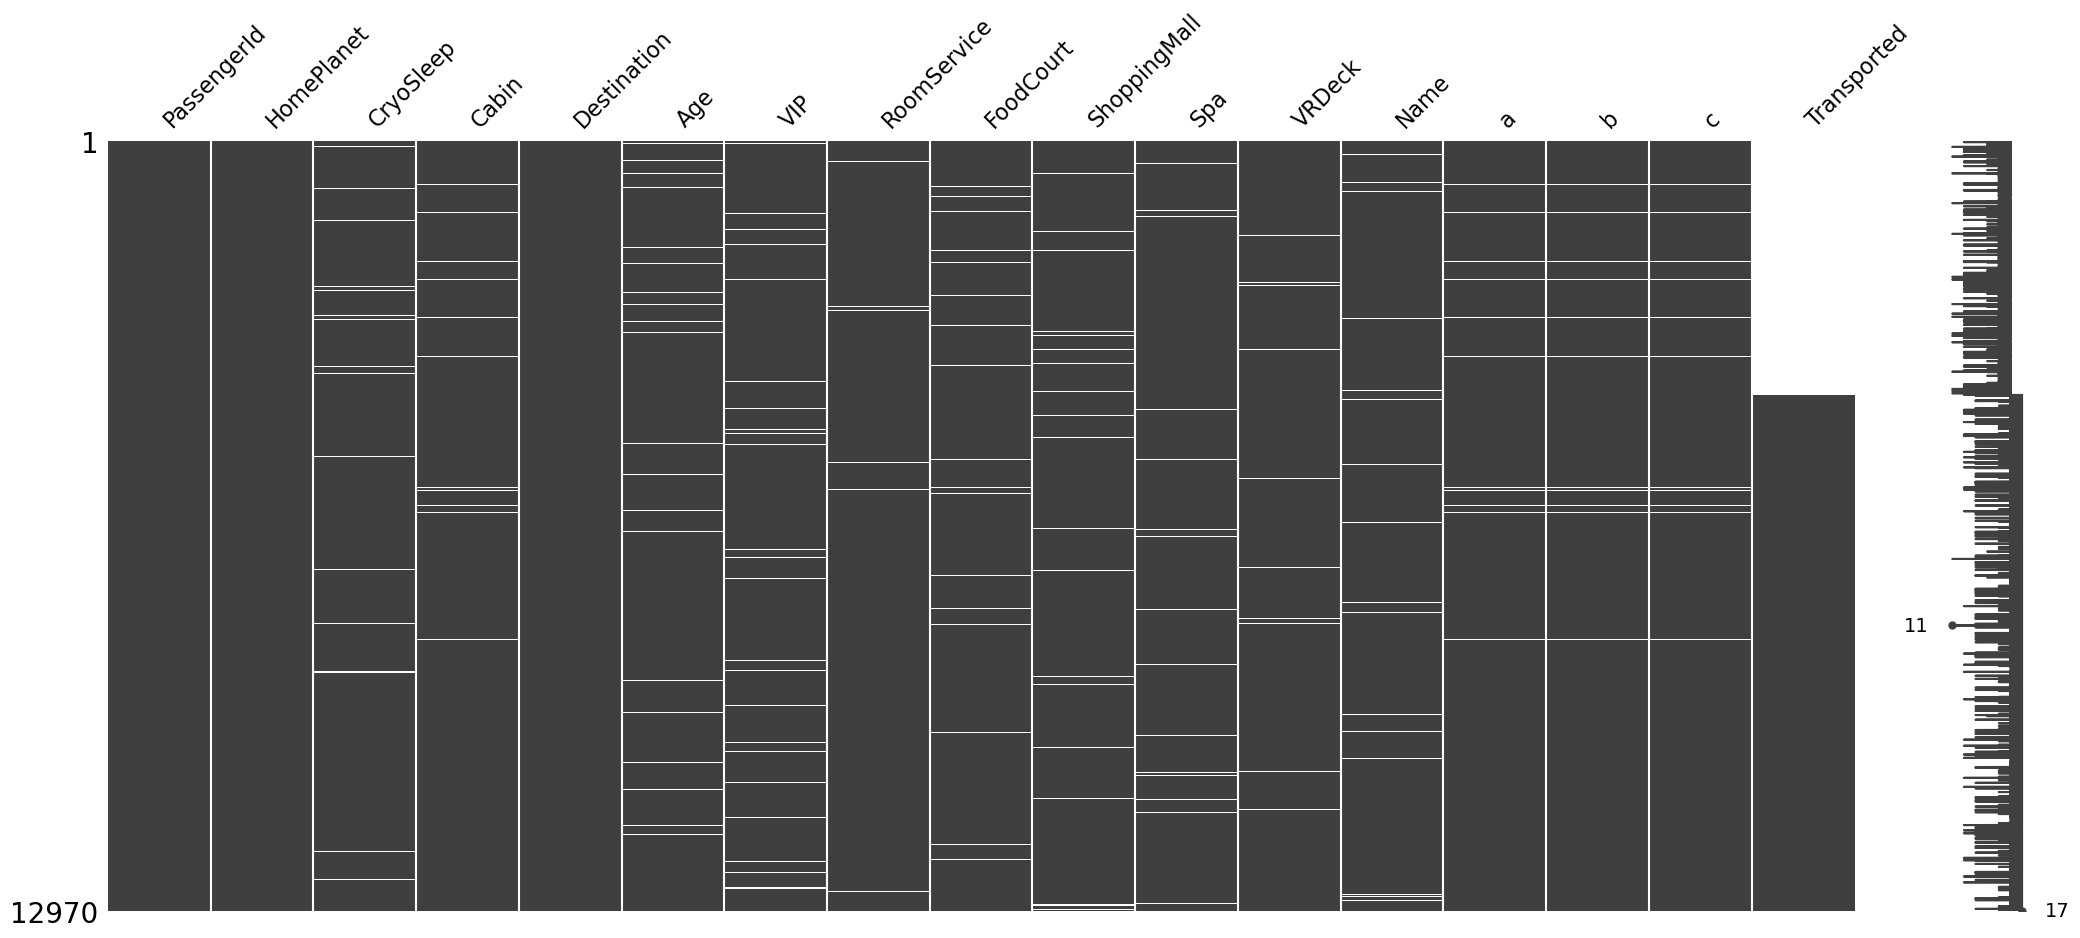

In [52]:
merged_df['Destination']=merged_df['Destination'].fillna('missing')
merged_df['HomePlanet']=merged_df['HomePlanet'].fillna('missing')
msno.matrix(merged_df)

In [53]:
imputed_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
12965,41.0,0.0,6819.0,0.0,1643.0,74.0
12966,18.0,0.0,0.0,0.0,0.0,0.0
12967,26.0,0.0,0.0,1872.0,1.0,0.0
12968,32.0,0.0,1049.0,0.0,353.0,3235.0


Replace columns

In [54]:
columns_to_replace = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in columns_to_replace:
    merged_df[col] = imputed_data[col]

<AxesSubplot:>

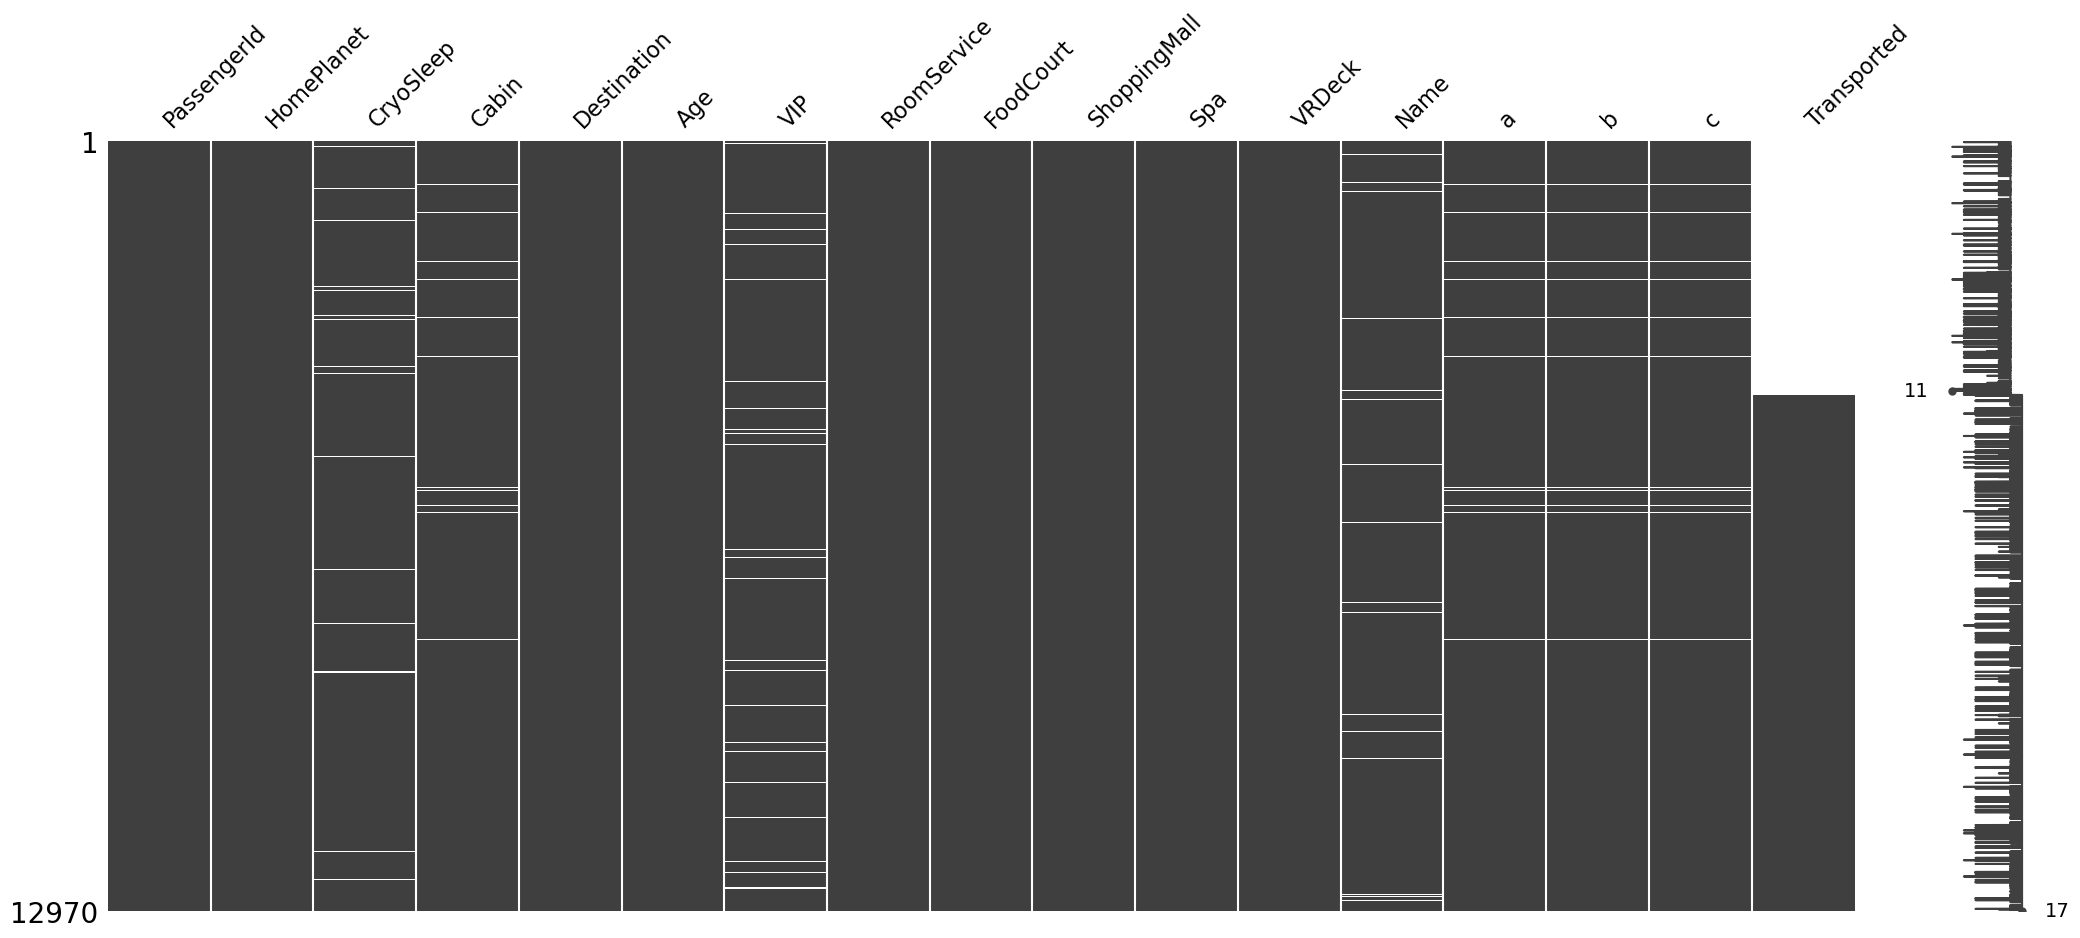

In [55]:
msno.matrix(merged_df)

In [56]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  int64  
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12660 non-null  float64
 3   Cabin         12671 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12674 non-null  float64
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12676 non-null  object 
 13  a             12671 non-null  object 
 14  b             12671 non-null  float64
 15  c             12671 non-null  object 
 16  Transported   8693 non-null   object 
dtypes: float64(9), int64(1), object(7)
memory usage: 2.3+ MB


In [57]:
merged_df['CryoSleep'] = merged_df['CryoSleep'].astype(float)
merged_df['VIP'] = merged_df['VIP'].astype(float)

In [58]:
merged_df['CryoSleep']=merged_df['CryoSleep'].fillna(2)
merged_df['VIP']=merged_df['VIP'].fillna(2)

In [59]:
merged_df['CryoSleep'].value_counts()

0.0    8079
1.0    4581
2.0     310
Name: CryoSleep, dtype: int64

In [60]:
merged_df['VIP'].value_counts()

0.0    12401
2.0      296
1.0      273
Name: VIP, dtype: int64

In [61]:
merged_df['Cabin']=merged_df['Cabin'].fillna('missing')
merged_df['Name']=merged_df['Name'].fillna('missing')
merged_df['a']=merged_df['a'].fillna('missing')
merged_df['b']=merged_df['b'].fillna('missing')
merged_df['c']=merged_df['c'].fillna('missing')

<AxesSubplot:>

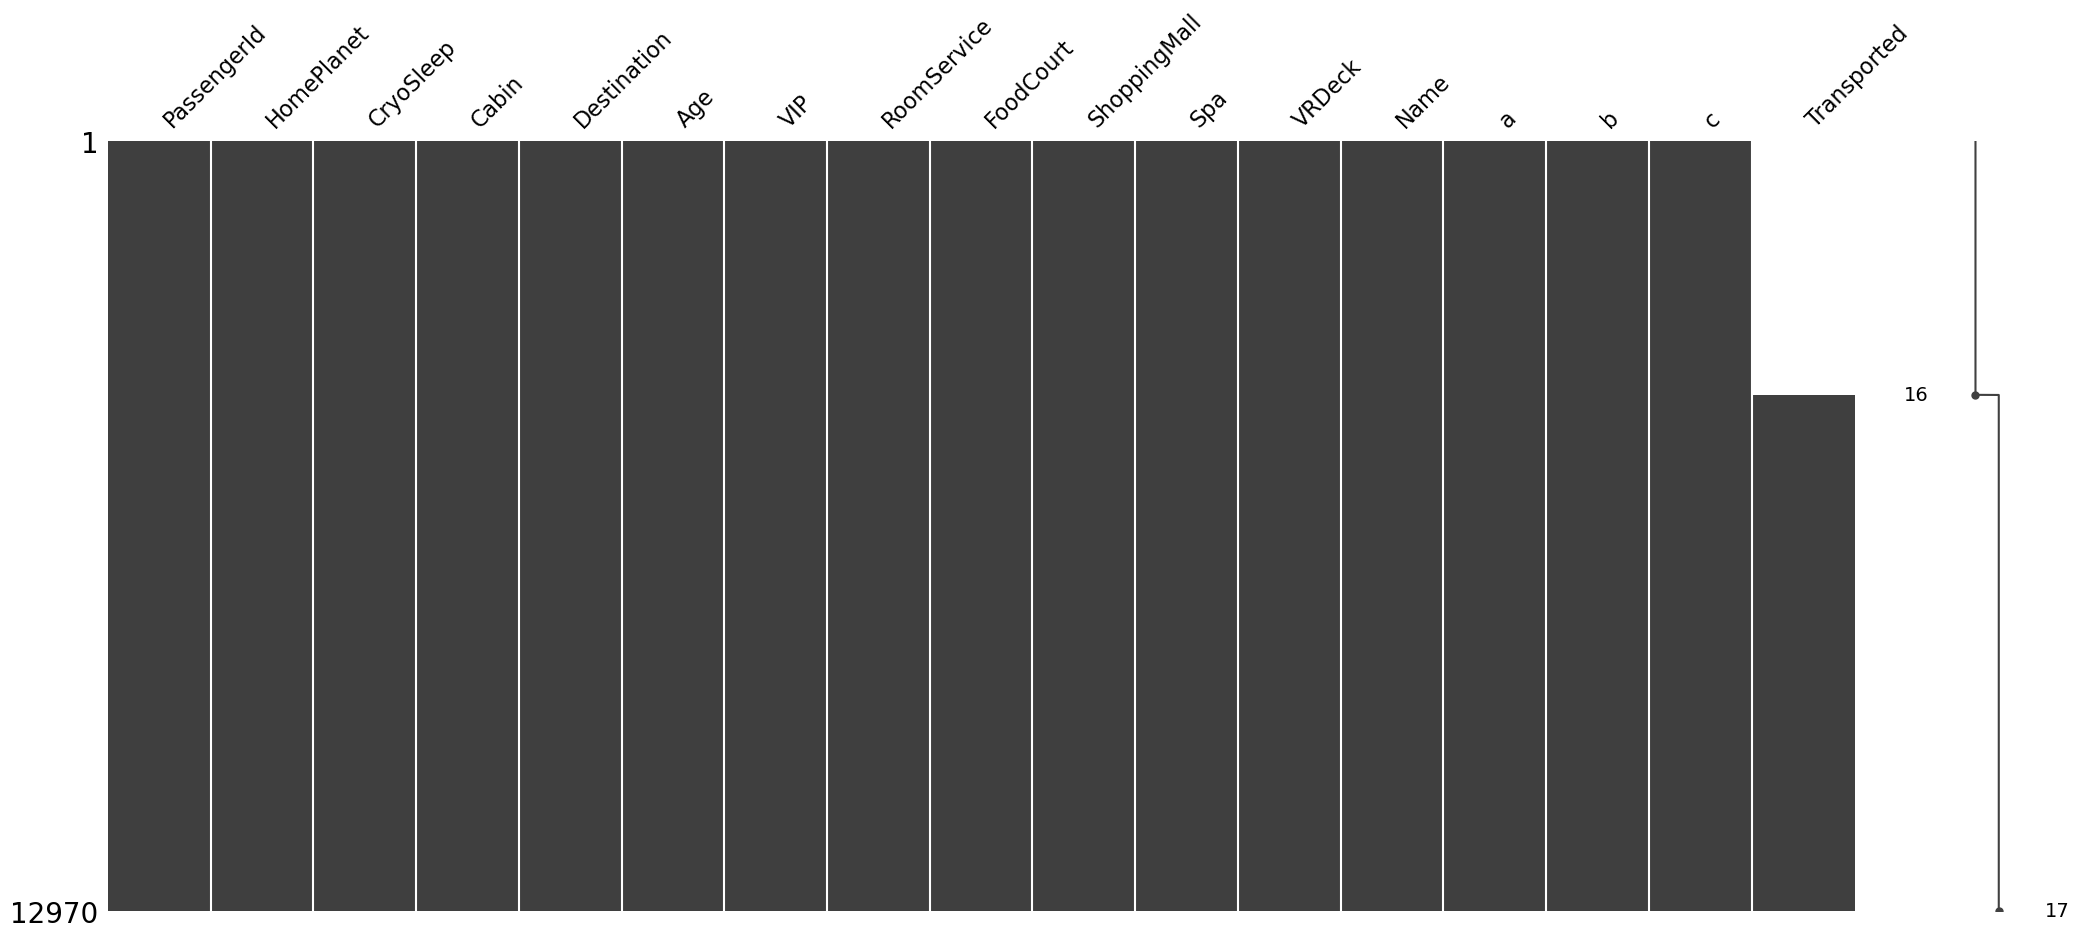

In [62]:
msno.matrix(merged_df)

In [65]:
merged_df.to_csv(r"C:\Users\user\OneDrive\שולחן העבודה\Project Avital Spaceship Titanic\clean_merged_df.csv")

In [66]:
merged_df.to_pickle("df.pkl")

# model sellection